# Aula 8 - Regressão Logística

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Introdução
- 2) Métricas de performance para problemas de classificação
- 3) Regressão logística

____
____
____

## 1) Introdução

**Problemas de Classificação** são aqueles em que queremos determinar a que **CATEGORIA** dentro de um **CONJUNTO DE CATEGORIAS** uma dada observação pertence, com base em suas features.

Para isso, construímos um **CLASSIFICADOR**: modelo que tem como input as features (contínuas ou discretas) e como output uma entre as classes (discretas)


Principal diferença entre problemas de regressão e classificação:
- Regressão: valores contínuos;
- Classificação: valores (classes) discretas (binárias ou não).

<img src="https://i0.wp.com/vinodsblog.com/wp-content/uploads/2018/11/Classification-vs-Regression.png?fit=2048%2C1158&ssl=1" width=700>


<img src="https://i.pinimg.com/originals/71/8e/6a/718e6a40e1782bead960e58d3c52663b.png" width=300>

Exemplos de problemas de classificação:
- Detecção de e-mails SPAM: um e-mail é SPAM ou não?;
    - Features: palavras contidas no corpo do e-mail; remetente; assunto;
- Detecção de doenças: que codição médica a pessoa tem?
    - Features: sintomas fisiológicos; resultados de exames (medidas de variáveis biológicas);
- Detecção do tipo de documento: secreto, confidencial ou não-sensível?
    - Features: palavras no corpo do texto; título;
- Detecção de fraudes de cartão de crédito: uma operação é fraudulenta ou não?;
    - Features: histórico de transações; hora, local e frequência das transações; tipo de compra;
- Modelo de risco de crédito: qual é a chance de determinada pessoa não pagar seu empréstimo?
    - Features: histórico de pagamento; score de crédito;
    
    
<img src="https://developers.google.com/machine-learning/guides/text-classification/images/TextClassificationExample.png" width=500>



Veremos hoje um dos mais simples e poderosos classificadores: a **LOGIT!**


____
____
____

## 2) Métricas de performance para problemas de classificação

Após treinar o modelo, como podemos avaliar sua performance?

No caso de problemas de classificação, existem **métricas específicas**, e também um importante conceito chamado de **Matriz de Confusão**.

A **matriz de confusão** leva em consideração as **classes preditas** e as **classes verdadeiras** da base de **teste**, e contabiliza a performance do modelo:

<img src=https://diegonogare.net/wp-content/uploads/2020/04/matrizConfusao-600x381.png height="400" width="400">

No Sklearn, a notação muda um pouco:

<img src="https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg" width=400>

Note que a diagonal principal são as observações que o modelo acertou! Temos:

- Verdadeiros Positivos (VP): classificação correta da classe positivo;
- Verdadeiros Negativos (VN): classificação correta da classe negativo;
- Falsos Positivos (FP, erro tipo I): correto: negativo. Previsto: positivo.
- Falsos Negativos (FN, erro tipo II): correto: positivo. Previsto: negativo.

Um jeito fácil de lembrar os tipos de erros:


<img src="https://i.pinimg.com/originals/f6/9b/11/f69b111014ef466fe541a393346d2c3a.jpg" height="400" width="400">


Além disso, temos as seguintes métricas numéricas de avaliação:

- Acurácia (Accuracy): porcentagem de classificações CORRETAS do modelo;

- Precisão (Precision): das respostas retornadas, quantas são relevantes? -- é a razão entre verdadeiros positivos e o  número de **preditos positivos**, isto é, positivos quanto à **label predita pelo modelo**.

- Revocação/Sensibilidade (Recall/Sensitivity): das respostas relevantes, quantas são retornadas? -- é a razão entre verdadeiros positivos e o  número de **verdadeiramente positivos**, isto é, positivos quanto à **label real**.

- F1-Score: média harmônica de precision e recall.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/1200px-Precisionrecall.svg.png" width=450>

Devido ao <a href="https://medium.com/opex-analytics/why-you-need-to-understand-the-trade-off-between-precision-and-recall-525a33919942">tradeoff entre precision e recall</a>, a métrica a ser otimizada é o F1! 


<img src="https://miro.medium.com/max/1080/1*t1vf-ofJrJqtmam0KSn3EQ.png" height="400" width="400">

Adiante, veremos como calcular a matriz de confusão e as métricas acima para problemas de classificação!

___
___
___

## 3) Regressão Logística

A [Regressão Logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) (também chamado de **logit**), apesar do nome, é um modelo de classificação!

- Classificação binária: duas classes (0 e 1);
- Classificação multiclasse: n classes (0, 1, ..., n-1), com $n \in \mathbb{N}$

O objetivo da regressão logística é: **modelar a PROBABILIDADE $P(x)$ de dada observação (com features $x$) pertencer à classe 1**, ou seja, queremos encontrar um modelo que nos dê:

$$ P( x \in 1 | x) $$

Naturalmente, $0 \le P(x) \le 1$. Assim, por exemplo, se:
- $P(x) \ge 0,5$: x pertence à classe 1
- $P(x) < 0.5$: x pertence à classe 0

Obs.: este valor de 0.5 (50%) é chamado de "cutoff", e pode ser ajustado, embora seja comum fixá-lo em 50%!

Poderíamos pensar em utilizar a regressão linear em nossos problemas de classificação, mas isso não é uma boa ideia: acabamos encontrando probabilidades negativas e fit ruim!

No exemplo a seguir, temos a probabilidade de não-pagamento (default) de um empréstimo com base em uma feature (balanço). Note probabilidades negativas!

<figure>
    <img src="https://s3-sa-east-1.amazonaws.com/lcpi/70189f79-2886-4e59-893b-1dac9dd64078.png" height="400" width="400">
    <figcaption>
        Regressão Linear para classificação. Fonte: 
        <a href="http://faculty.marshall.usc.edu/gareth-james/ISL/">ISLR</a>
    </figcaption>
</figure> 

Para resolver este problema, podemos adaptar a função de regressão linear para uma função que tem imagem entre 0 e 1. Seria legal se tivéssemos algo como:

<figure>
    <img src="https://s3-sa-east-1.amazonaws.com/lcpi/6d54529a-d295-47a3-8a11-1f426fde7229.png" height="400" width="400">
    <figcaption>
        Classificador. Fonte: 
        <a href="http://faculty.marshall.usc.edu/gareth-james/ISL/">ISLR</a>
    </figcaption>
</figure> 

Um exemplo de tal função é a FUNÇÃO LOGÍSTICA ou FUNÇÃO SIGMOIDAL:

<img src="https://miro.medium.com/max/970/1*Xu7B5y9gp0iL5ooBj7LtWw.png" width=400>

Note que:
- $z \in \mathbb{R}$
- $0 \le \phi(z) \le 1$

Para incorporar a ideia da regressão linear na regressão logística, tomamos:

- $z = \beta_0 + \beta_1x$, que é o modelo de regressão linear (uma variável);

E substituímos na função logística:

- $\phi(x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x)}}$

Com isso, tomamos qualquer output real do modelo linear e transformamos em um valor entre 0 e 1, como queríamos!

<img src="http://juangabrielgomila.com/wp-content/uploads/2015/04/LogReg_1.png" width="500">

No nosso caso, como queremos modelar probabilidades, tomamos, no caso de uma feature:

$P(x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x)}}$

Ou, para a regressão logística múltipla com $p$ features:


$P((x_1, \cdots, x_p)) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \cdots + \beta_p x_p)}}$

__________________

Para introduzirmos as ideias, utilizaremos um dataset de marketing (propagandas/advertising), que está disponível no <a href="https://www.kaggle.com/fayomi/advertising">Kaggle</a>. Este é um dataset artificial e didático, com os dados bem separáveis, o que é ótimo para ilustração!<br>

Visite o Kaggle e procure por "advertising" para datasets relacionados reais e ainda mais interessantes

A base que utilizaremos contém as seguintes colunas:

* 'Daily Time Spent on Site': tempo que o cliente ficou no site (em minutos);
* 'Age': idade do cliente (em anos);
* 'Area Income': média salarial (por ano) da região geográfica do cliente;
* 'Daily Internet Usage': tempo médio (em minutos) que o cliente fica na internet;
* 'Ad Topic Line': título do anúncio;
* 'City': cidade do cliente;
* 'Male': dummy indicando se o cliente é do sexo masculino (1) ou não (0);
* 'Country': país do cliente;
* 'Timestamp': marcação de tempo em que o cliente clickou no anúncio OU fechou a página
* 'Clicked on Ad': dummy indicando se o cliente clickou no anúncio (1) ou não (0).

Nosso objetivo é criar um modelo que possa prever se um determinado usuário clickará em um anúncio online ou não, com base em suas características pessoais/comportamentais, bem como informações relativas ao anúncio.

Tomamos como variáveis independentes (preditores/features) as primeiras 9 colunas, enquanto nossa variável dependente (target) é a última coluna ("Clicked on Ad").

Ou seja, nosso modelo deve ser capaz de dizer se um usuário com um conjunto particular das 9 features clickará no anúncio ou não. 

__IMPORTANTE!__

Pense no problema de negócio que estamos querendo resolver com nosso modelo -- direcionamento de marketing! Temos os dados dos nossos clientes (customer-centric), nós os conhecemos! Não podemos utilizar essa informação a nosso favor?

Talvez não faça sentido exibir o anúncio para um usuário que tem baixa probabilidade de clickar no ad, não é mesmo? 

Por outro lado, é muito mais eficiente direcionar nosso marketing aos clientes com alta chance de clickar no nosso anúncio!

Assim, economizamos dinheiro (todo anúncio é pago!), e ganhamos em eficiência e alcance!

___
___
___

In [2]:
# importe as principais bibliotecas
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

O código abaixo é apenas para formatar os números em até 3 casas decimais. 

Fica aqui pra conhecimento e também pq vai nos auxiliar a ver melhor as probabilidades no final.

In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
np.set_printoptions(suppress=True, precision=3)

In [4]:
# leia os dados em '../datasets/advertising.csv'

df = pd.read_csv('../datasets/advertising.csv')

In [6]:
# de uma olhada nas 5 primeiras linhas

df.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.950,35,61833.900,256.090,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.230,31,68441.850,193.770,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.470,26,59785.940,236.500,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.150,29,54806.180,245.890,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.370,35,73889.990,225.580,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.990,23,59761.560,226.740,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.910,33,53852.850,208.360,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.000,48,24593.330,131.760,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.530,30,68862.000,221.510,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.880,20,55642.320,183.820,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


In [7]:
# dê uma olhada no info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [8]:
# olhe as estatísticas básicas

df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000
mean,65.000,36.009,55000.000,180.000,0.481,0.500
std,15.854,8.786,13414.634,43.902,0.500,0.500
min,32.600,19.000,13996.500,104.780,0.000,0.000
25%,51.360,29.000,47031.802,138.830,0.000,0.000
50%,68.215,35.000,57012.300,183.130,0.000,0.500
75%,78.547,42.000,65470.635,218.793,1.000,1.000
max,91.430,61.000,79484.800,269.960,1.000,1.000


Alguma observação notável?

In [10]:
# dê uma olhada na distribuição do target

df["Clicked on Ad"].value_counts(normalize=True)

1   0.500
0   0.500
Name: Clicked on Ad, dtype: float64

Temos um dataset balanceado no target, o que __bem raro na vida real!__

Um dataset desbalanceado pode causar sérios problemas de performance ao modelo! Há várias técnicas para lidar com tal problema, mas, neste primeiro exemplo, não nos preocuparemos com isso...

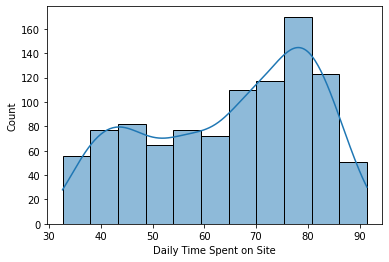

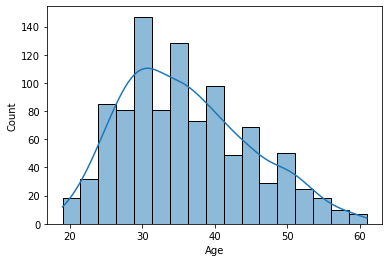

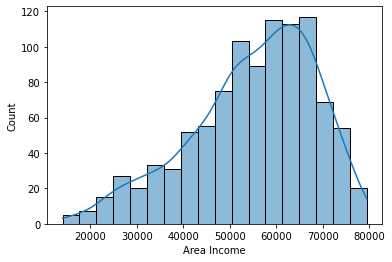

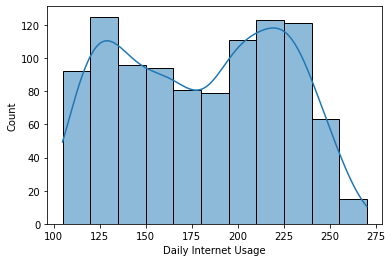

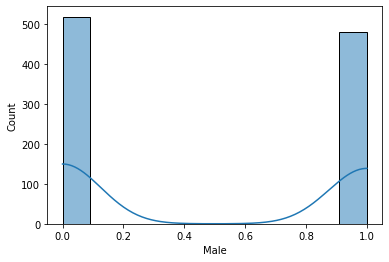

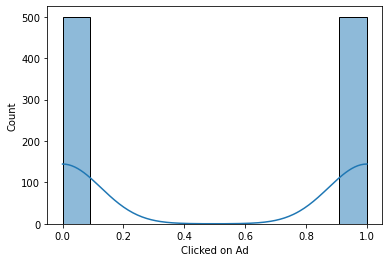

In [15]:
# dê uma olhada na distribuição das variáveis numéricas
# lembre do df.select_dtypes(include=[np.number])

for col in df.select_dtypes(include=[np.number]).columns:
    
    sns.histplot(data=df, x=col, kde=True)
    plt.show()

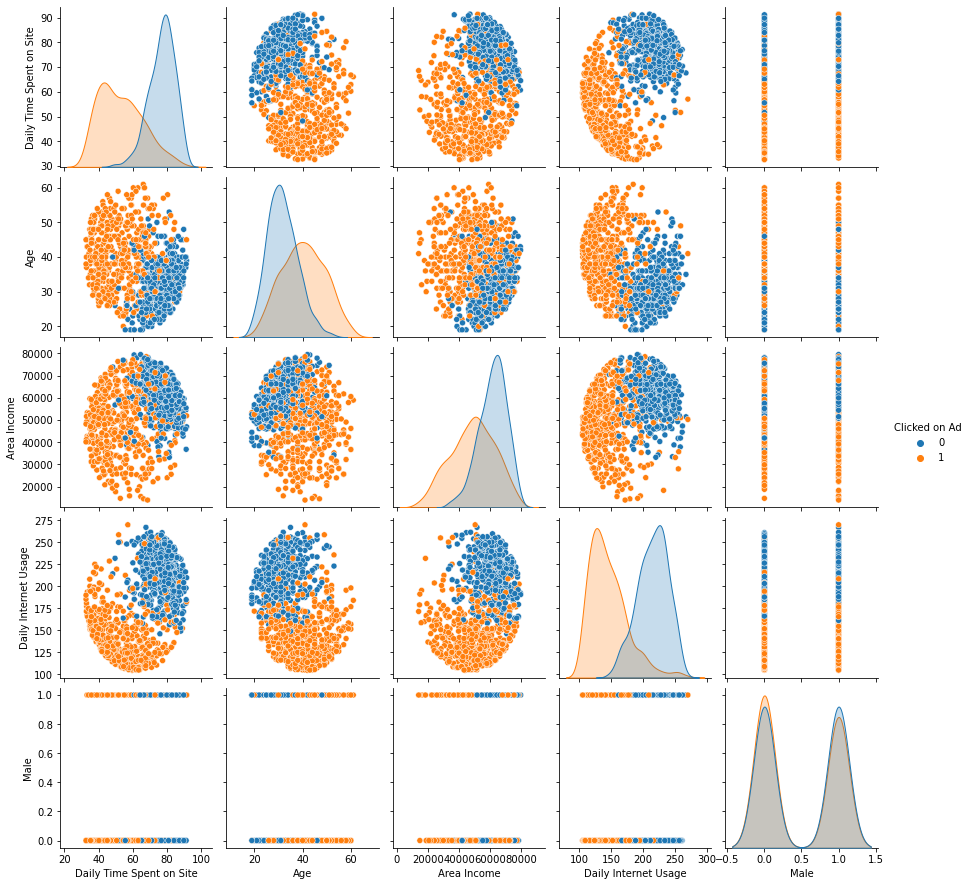

In [17]:
# faça um pairplot usando o hue como target -- isso é sempre uma boa prática em problemas de classificação!

sns.pairplot(df, hue="Clicked on Ad")

Como tínhamos comentado no início, nossos dados são muito bem separáveis!

Isto favorece bastante a performance do nosso modelo. Mas, lembre-se, é bem raro encontrar casos assim na vida real! (É aí que devemos partir para métodos mais avançados, como SVM, árvores, etc.)

Vamos começar a construir o modelo?

In [26]:
# crie as variáveis X e y, com as features e o target
# utilize todas as features numéricas - dica: df.select_dtypes(include=[np.number])

X = df.select_dtypes(include=[np.number]).drop(columns="Clicked on Ad")
y = df["Clicked on Ad"]

In [27]:
X

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.950,35,61833.900,256.090,0
1,80.230,31,68441.850,193.770,1
2,69.470,26,59785.940,236.500,0
3,74.150,29,54806.180,245.890,1
4,68.370,35,73889.990,225.580,0
...,...,...,...,...,...
995,72.970,30,71384.570,208.580,1
996,51.300,45,67782.170,134.420,1
997,51.630,51,42415.720,120.370,1
998,55.550,19,41920.790,187.950,0


In [28]:
y

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Clicked on Ad, Length: 1000, dtype: int64

In [29]:
# 1) Importe a classe do estimador que se deseja treinar

from sklearn.linear_model import LogisticRegression

In [30]:
# 2) Instancie a classe do estimador, escolhendo os hiperparâmetros desejados (não há muitos)

estimador = LogisticRegression()

In [31]:
# 3) Separe os dados em dados de treino e dados de teste
# dica: procure pelo "train_test_split"

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [33]:
X_test

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
521,63.260,29,54787.370,120.460,1
737,71.230,52,41521.280,122.590,0
740,43.630,38,61757.120,135.250,1
660,42.040,49,67323.000,182.110,0
411,78.680,29,66225.720,208.050,0
...,...,...,...,...,...
408,51.680,49,51067.540,258.620,0
332,56.300,49,67430.960,135.240,1
208,59.510,58,39132.640,140.830,0
613,76.210,31,65834.970,228.940,1


In [35]:
# 4) Treine o modelo, usando os dados de treino. 

modelo = estimador.fit(X_train, y_train)

__Modelo treinado!__

Vamos ver os coeficientes do modelo:

In [36]:
# capture e exiba o intercept e os demais coeficientes

modelo.intercept_

array([0.006])

In [37]:
modelo.coef_

array([[-0.056,  0.262, -0.   , -0.027,  0.002]])

In [39]:
X_train

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
29,76.020,22,46179.970,209.820,0
535,78.760,32,70012.830,208.020,1
695,73.490,38,67132.460,244.230,0
557,79.670,28,58576.120,226.790,0
836,49.210,46,49206.400,115.600,0
...,...,...,...,...,...
106,72.230,25,46557.920,241.030,1
270,44.490,53,63100.130,168.000,1
860,91.370,45,51920.490,182.650,1
435,56.660,42,72684.440,139.420,0


Lembre-se que, diferentemente da regressão linear, devido ao fato da função logística ser uma exponencial, a variação de $P(x)$ depende de x, e não apenas dos coeficientes! Então, a interpretação dos coeficientes não é tão imediata. 

Mas, os sinais carregam significado. Para um coeficiente:
- positivo ($\beta_i > 0$), temos que um aumento em x levará a um aumento de $P(x)$;
- negativo ($\beta_i < 0$), temos que um aumento em x levará a uma diminuição de $P(x)$

Mas, a variacão de $P(x)$ em si, depende do valor de x!

__Agora que o modelo está treinado, vamos avaliá-lo!__

In [46]:
# 5) Use o modelo treinado para fazer previsões usando os dados de teste 

y_pred = modelo.predict(X_test)

Como vimos no passo 2, em problemas de classificação é muito comum utilizarmos a **matriz de confusão** e as **métricas de classificação** para avaliar nossos modelos.

Dado isso, o sklearn já disponibilica estas funcionalidades:

In [55]:
# 6) Avalie a performance do modelo com base nas previsões acima

from sklearn.metrics import classification_report, confusion_matrix

print("Matriz de confusão do modelo nos dados de teste:\n")
print(confusion_matrix(y_test, y_pred))

print("\nMatriz de confusão do modelo nos dados de teste:\n")
print(classification_report(y_test, y_pred))

Matriz de confusão do modelo nos dados de teste:

[[85  4]
 [16 95]]

Matriz de confusão do modelo nos dados de teste:

              precision    recall  f1-score   support

           0       0.84      0.96      0.89        89
           1       0.96      0.86      0.90       111

    accuracy                           0.90       200
   macro avg       0.90      0.91      0.90       200
weighted avg       0.91      0.90      0.90       200



Conforme esperado, nosso modelo está muito bom! Um f1-score tão alto na vida real é algo notável!

Isso se deve à grande separabilidade dos nossos dados!

Além dos coeficientes do modelo, algo muito interessante que a classe do sklearn tem é o método `predict_proba()`

Esse método retorna exatamente qual é a probabilidade modelada pelo logit.

Isso pode ser muito útil, pois assim conseguimos **mudar qual é o threshold de esclha de classe** para ser algo diferente de 0.5!


In [57]:
# use o atributo classes_ para captar as classes do modelo

modelo.classes_

array([0, 1], dtype=int64)

In [60]:
modelo.predict(X_test)

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1], dtype=int64)

In [74]:
# calcule as probabilidades com o método predict_proba()

probs = modelo.predict_proba(X_test)

In [79]:
probs[:, 1]

array([0.498, 0.997, 0.95 , 0.99 , 0.032, 0.289, 0.025, 0.99 , 0.313,
       0.947, 0.02 , 0.908, 0.997, 0.026, 0.917, 0.993, 0.999, 0.967,
       0.098, 0.99 , 0.097, 0.986, 0.994, 0.016, 0.022, 0.995, 0.009,
       0.016, 0.99 , 0.732, 0.018, 0.672, 0.038, 0.857, 0.998, 0.075,
       0.026, 0.117, 0.862, 0.978, 0.016, 0.916, 0.025, 0.983, 0.014,
       0.104, 0.992, 0.998, 0.025, 0.997, 0.979, 0.009, 0.883, 0.013,
       0.116, 0.07 , 0.141, 0.998, 0.027, 0.96 , 0.082, 0.991, 0.114,
       0.97 , 0.877, 0.973, 0.998, 0.067, 0.707, 0.949, 0.972, 0.505,
       0.133, 0.054, 0.842, 0.068, 0.037, 0.963, 0.496, 0.069, 0.989,
       0.964, 0.576, 0.556, 0.08 , 0.043, 0.021, 0.006, 0.088, 0.041,
       0.092, 0.222, 0.072, 0.902, 0.23 , 0.034, 0.999, 0.891, 0.102,
       0.031, 0.916, 0.01 , 0.992, 0.035, 0.996, 0.509, 0.865, 0.403,
       0.985, 0.048, 0.998, 0.061, 0.958, 0.995, 0.195, 0.52 , 0.025,
       0.154, 0.046, 0.467, 0.902, 0.968, 0.999, 0.027, 0.238, 0.029,
       0.534, 0.031,

In [66]:
probs[:, 0]

array([0.502, 0.003, 0.05 , 0.01 , 0.968, 0.711, 0.975, 0.01 , 0.687,
       0.053, 0.98 , 0.092, 0.003, 0.974, 0.083, 0.007, 0.001, 0.033,
       0.902, 0.01 , 0.903, 0.014, 0.006, 0.984, 0.978, 0.005, 0.991,
       0.984, 0.01 , 0.268, 0.982, 0.328, 0.962, 0.143, 0.002, 0.925,
       0.974, 0.883, 0.138, 0.022, 0.984, 0.084, 0.975, 0.017, 0.986,
       0.896, 0.008, 0.002, 0.975, 0.003, 0.021, 0.991, 0.117, 0.987,
       0.884, 0.93 , 0.859, 0.002, 0.973, 0.04 , 0.918, 0.009, 0.886,
       0.03 , 0.123, 0.027, 0.002, 0.933, 0.293, 0.051, 0.028, 0.495,
       0.867, 0.946, 0.158, 0.932, 0.963, 0.037, 0.504, 0.931, 0.011,
       0.036, 0.424, 0.444, 0.92 , 0.957, 0.979, 0.994, 0.912, 0.959,
       0.908, 0.778, 0.928, 0.098, 0.77 , 0.966, 0.001, 0.109, 0.898,
       0.969, 0.084, 0.99 , 0.008, 0.965, 0.004, 0.491, 0.135, 0.597,
       0.015, 0.952, 0.002, 0.939, 0.042, 0.005, 0.805, 0.48 , 0.975,
       0.846, 0.954, 0.533, 0.098, 0.032, 0.001, 0.973, 0.762, 0.971,
       0.466, 0.969,

In [70]:
# determine a classe através da seguinte lógica:
# se a p(x=1) > threshold, é classe 1, se não, classe 0
# dica: use o np.where()

cutoff = 0.7

np.where(probs[:, 0] > cutoff, 0, 1)

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1])

In [69]:
y_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1], dtype=int64)

Vamos avaliar diferentes cutoffs...

In [71]:
# leia a base
df = pd.read_csv("../datasets/advertising.csv")

# apenas as features numericas
df = df.select_dtypes(include=[np.number])

# separe as features e o target
X = df.drop(columns = 'Clicked on Ad')
y = df['Clicked on Ad']

# 1) importe a classe do classificador
from sklearn.linear_model import LogisticRegression

# 2) instancie a classe
estimador = LogisticRegression(max_iter=1000)

# 3) faça o train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
# 4) treine o modelo
modelo = estimador.fit(X_train, y_train)

# dê uma olhada nos coeficientes
print("Coeficientes:\n", modelo.coef_)
print("\nIntercept:", modelo.intercept_)

# dê uma olhada nas classes do modelo
classes =  modelo.classes_
print("\nClasses:", classes)

# 5) probabilidades das previsões
probs = modelo.predict_proba(X_test)

# probabilidade de pertencimento à classe 0
probs_0 = probs[:, 0]

# avaliação  do modelo
from sklearn.metrics import classification_report, confusion_matrix

threshold_list = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

print("\n###################################################\n")
print("Avaliação de modelos com diferentes valores de cutoff")
print("\n###################################################\n")

for threshold in threshold_list:
    
    print("\n Cutoff:", threshold)
    
    # previsões
    y_pred = np.where(probs_0 > threshold, 0, 1)

    print("\nMatriz de confusão do modelo nos dados de teste:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification report do modelo nos dados de teste:")
    print(classification_report(y_test, y_pred))
    
    print("\n##########################################################\n")

Coeficientes:
 [[-0.056  0.262 -0.    -0.027  0.002]]

Intercept: [0.006]

Classes: [0 1]

###################################################

Avaliação de modelos com diferentes valores de cutoff

###################################################


 Cutoff: 0.3

Matriz de confusão do modelo nos dados de teste:
[[88  1]
 [26 85]]

Classification report do modelo nos dados de teste:
              precision    recall  f1-score   support

           0       0.77      0.99      0.87        89
           1       0.99      0.77      0.86       111

    accuracy                           0.86       200
   macro avg       0.88      0.88      0.86       200
weighted avg       0.89      0.86      0.86       200


##########################################################


 Cutoff: 0.4

Matriz de confusão do modelo nos dados de teste:
[[86  3]
 [24 87]]

Classification report do modelo nos dados de teste:
              precision    recall  f1-score   support

           0       0.78      0.97

___
___
___

## 4) Exercícios

Vamos treinar mais? Agora é com você!

_____________

### Exercício 1: leia o dataset tinanic e construa um classificador usando regressão logística

In [19]:
# APENAS DADOS NUMÉRICOS

# leia a base
df_titanic = pd.read_csv("../datasets/titanic.csv")

# dropando as linhas com NaN
df_titanic = df_titanic.dropna(how="any", axis=0)

# separe as features e o target
# apenas features numéricas!!
X = df_titanic.select_dtypes(include=[np.number])
y = df_titanic["Survived"]

# importe a classe do classificador
from sklearn.linear_model import LogisticRegression

# instancie a classe
estimador = LogisticRegression(max_iter=1000)

# faça o train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)
    
# treine o modelo
modelo = estimador.fit(X_train, y_train)

# dê uma olhada nos coeficientes
print("Coeficientes:\n", modelo.coef_)
print("\nIntercept:", modelo.intercept_)

# dê uma olhada nas classes do modelo
print("\nClasses:", modelo.classes_)

# faça previsões
y_pred = modelo.predict(X_test)
print("\nPrevisões nos dados de teste:\n", y_pred)

# dê uma olhada nas probabilidades das previsões
probs = modelo.predict_proba(X_test)
print("\nProbabilidades dos dados teste:\n", probs)

# avalie o modelo
from sklearn.metrics import classification_report, confusion_matrix

print("\nMatriz de confusão do modelo nos dados de teste:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification report do modelo nos dados de teste:")
print(classification_report(y_test, y_pred))

Coeficientes:
 [[ 8.71029996e-04  4.62044559e+00 -1.13130419e-01 -2.37383498e-02
   3.15625984e-01 -1.86638606e-01  3.03604641e-03]]

Intercept: [-1.52962348]

Classes: [0 1]

Previsões nos dados de teste:
 [0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0]

Probabilidades dos dados teste:
 [[0.82050936 0.17949064]
 [0.01505436 0.98494564]
 [0.66759171 0.33240829]
 [0.94090724 0.05909276]
 [0.03447741 0.96552259]
 [0.91390977 0.08609023]
 [0.06740992 0.93259008]
 [0.03257984 0.96742016]
 [0.05168053 0.94831947]
 [0.05595658 0.94404342]
 [0.09394533 0.90605467]
 [0.06027048 0.93972952]
 [0.05992393 0.94007607]
 [0.06946177 0.93053823]
 [0.83896267 0.16103733]
 [0.03257102 0.96742898]
 [0.05529853 0.94470147]
 [0.90318091 0.09681909]
 [0.0203963  0.9796037 ]
 [0.7277133  0.2722867 ]
 [0.04629125 0.95370875]
 [0.03303162 0.96696838]
 [0.05902037 0.94097963]
 [0.09946421 0.90053579]
 [0.08004747 0.91995253]
 [0.06617

In [31]:
# APENAS DADOS NUMÉRICOS
# + preenchendo as idades

# leia a base
df_titanic = pd.read_csv("../datasets/titanic.csv")

# preenchendo a coluna de idades com a média de idades
df_titanic["Age"] = df_titanic["Age"].fillna(df_titanic["Age"].mean())

# separe as features e o target
# apenas features numéricas!!
X = df_titanic.select_dtypes(include=[np.number])
y = df_titanic["Survived"]

# importe a classe do classificador
from sklearn.linear_model import LogisticRegression

# instancie a classe
estimador = LogisticRegression(max_iter=1000)

# faça o train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)
    
# treine o modelo
modelo = estimador.fit(X_train, y_train)

# dê uma olhada nos coeficientes
print("Coeficientes:\n", modelo.coef_)
print("\nIntercept:", modelo.intercept_)

# dê uma olhada nas classes do modelo
print("\nClasses:", modelo.classes_)

# faça previsões
y_pred = modelo.predict(X_test)
print("\nPrevisões nos dados de teste:\n", y_pred)

# dê uma olhada nas probabilidades das previsões
probs = modelo.predict_proba(X_test)
print("\nProbabilidades dos dados teste:\n", probs)

# avalie o modelo
from sklearn.metrics import classification_report, confusion_matrix

print("\nMatriz de confusão do modelo nos dados de teste:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification report do modelo nos dados de teste:")
print(classification_report(y_test, y_pred))


Coeficientes:
 [[-7.98923784e-05  7.12805748e+00 -4.18969228e-01 -2.11090372e-02
  -1.12733550e-01  1.30790598e-01  3.54179690e-03]]

Intercept: [-2.3056807]

Classes: [0 1]

Previsões nos dados de teste:
 [0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0
 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0
 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0
 1 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1
 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1
 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0]

Probabilidades dos dados teste:
 [[0.98307673 0.01692327]
 [0.05409606 0.94590394]
 [0.02939247 0.97060753]
 [0.9791697  0.0208303 ]
 [0.98499652 0.01500348]
 [0.97979379 0.02020621]
 [0.9848724


____________

### Exercício 2: leia o dataset iris e construa um classificador usando regressão logística

In [80]:
# leia a base
df_iris = pd.read_csv("../datasets/iris.csv")

In [82]:
df_iris["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

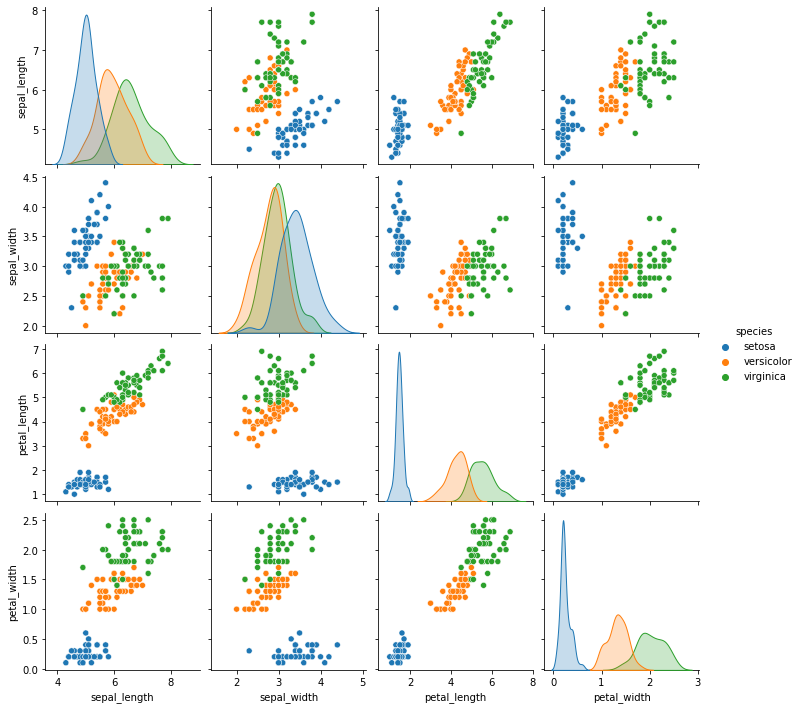

In [85]:
sns.pairplot(df_iris, hue="species")

In [84]:
# leia a base
df_iris = pd.read_csv("../datasets/iris.csv")

# separe as features e o target
X = df_iris.drop(columns = "species")
y = df_iris["species"]

# importe a classe do classificador
from sklearn.linear_model import LogisticRegression

# instancie a classe
estimador = LogisticRegression(max_iter=1000)

# faça o train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
# treine o modelo
modelo = estimador.fit(X_train, y_train)

# dê uma olhada nos coeficientes
print("Coeficientes:\n", modelo.coef_)
print("\nIntercept:", modelo.intercept_)

# dê uma olhada nas classes do modelo
print("\nClasses:", modelo.classes_)

# faça previsões
y_pred = modelo.predict(X_test)
print("\nPrevisões nos dados de teste:\n", y_pred)

# dê uma olhada nas probabilidades das previsões
probs = modelo.predict_proba(X_test)
print("\nProbabilidades dos dados teste:\n", probs)

# avalie o modelo
from sklearn.metrics import classification_report, confusion_matrix

print("\nMatriz de confusão do modelo nos dados de teste:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification report do modelo nos dados de teste:")
print(classification_report(y_test, y_pred))

Coeficientes:
 [[-0.39   0.856 -2.244 -0.953]
 [ 0.44  -0.361 -0.124 -0.772]
 [-0.05  -0.495  2.368  1.725]]

Intercept: [  8.693   2.116 -10.809]

Classes: ['setosa' 'versicolor' 'virginica']

Previsões nos dados de teste:
 ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'setosa' 'versicolor' 'virginica' 'virginica' 'versicolor' 'virginica']

Probabilidades dos dados teste:
 [[0.004 0.825 0.171]
 [0.943 0.057 0.   ]
 [0.    0.003 0.997]
 [0.007 0.778 0.215]
 [0.002 0.761 0.237]
 [0.952 0.048 0.   ]
 [0.081 0.899 0.019]
 [0.    0.149 0.851]
 [0.00

O problema do dataset iris é um problema de **classificação multiclasse**, pois há mais do que duas classes a serem preditas: no caso, 3.

<img src="https://utkuufuk.com/2018/06/03/one-vs-all-classification/one-vs-all.png">

Como vimos acima, o operacional de construção do modelo muda em absolutamente **nada**.

No entanto, conceitualmente, há algumas mudanças: a rigor, o modelo passa a se chamar **regresão logística MULTINOMIAL**, cujo processo de classificação é dado pela função **softmax**:

<img src="https://i.stack.imgur.com/YLeRi.png" width=600>

Para quem quiser saber mais sobre o "logit score", [clique aqui](https://stats.stackexchange.com/questions/329857/what-is-the-difference-between-decision-function-predict-proba-and-predict-fun).

Essencialmente, esse é o valor do termo linear usado como argumento da sigmoide, isto é, $z(x) = \beta_0 + \beta_1 x_1 + \cdots + \beta_p x_p$

In [86]:
# logit scores

modelo.decision_function(X_test)

array([[ -2.98 ,   2.276,   0.704],
       [  5.621,   2.807,  -8.428],
       [ -9.76 ,   1.929,   7.831],
       [ -2.692,   1.989,   0.703],
       [ -3.668,   2.417,   1.251],
       [  5.75 ,   2.767,  -8.516],
       [ -0.326,   2.079,  -1.753],
       [ -4.981,   1.62 ,   3.361],
       [ -3.369,   2.33 ,   1.04 ],
       [ -1.153,   2.28 ,  -1.126],
       [ -4.453,   1.64 ,   2.814],
       [  6.151,   2.892,  -9.043],
       [  6.435,   2.954,  -9.389],
       [  5.974,   2.887,  -8.861],
       [  6.304,   2.568,  -8.872],
       [ -3.011,   1.874,   1.137],
       [ -6.386,   1.47 ,   4.915],
       [ -1.151,   2.341,  -1.19 ],
       [ -2.47 ,   2.048,   0.423],
       [ -6.069,   1.524,   4.546],
       [  5.818,   2.673,  -8.491],
       [ -3.829,   1.715,   2.114],
       [  5.681,   2.579,  -8.26 ],
       [ -5.974,   1.601,   4.373],
       [ -7.403,   1.877,   5.526],
       [ -5.213,   1.556,   3.657],
       [ -6.511,   2.048,   4.463],
       [ -6.651,   1.44 ,   